# Examples

Some examples of how to use the anomaly agent.

<a target="_blank" href="https://colab.research.google.com/github/andrewm4894/anomaly-agent/blob/main/notebooks/examples.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [11]:
import os
import pandas as pd
from anomaly_agent.utils import make_df, make_anomaly_config
from anomaly_agent.plot import plot_df_matplotlib as plot_df
from anomaly_agent.agent import AnomalyAgent

pd.set_option('display.max_colwidth', None)

# set openai api key if not in environment
# os.environ['OPENAI_API_KEY'] = "<your-openai-api-key>"

In [12]:
# get and anomaly config to generate some dummy data
anomaly_cfg = make_anomaly_config()
print(anomaly_cfg)

# generate some dummy data
df = make_df(500, 3, anomaly_config=anomaly_cfg)
df.head()


{'enabled': True, 'fraction': 0.05, 'methods': ['spike', 'drop', 'shift', 'noise'], 'spike_factor': 10, 'shift_value': 3, 'noise_std': 0.2}


,timestamp,var1,var2,var3
0,2020-01-01,0.497166,0.652036,0.578127
1,2020-01-02,0.400659,0.880572,0.151246
2,2020-01-03,0.956371,0.220344,0.029360
3,2020-01-04,0.628746,0.249972,0.249382
4,2020-01-05,0.917257,0.541513,0.215437


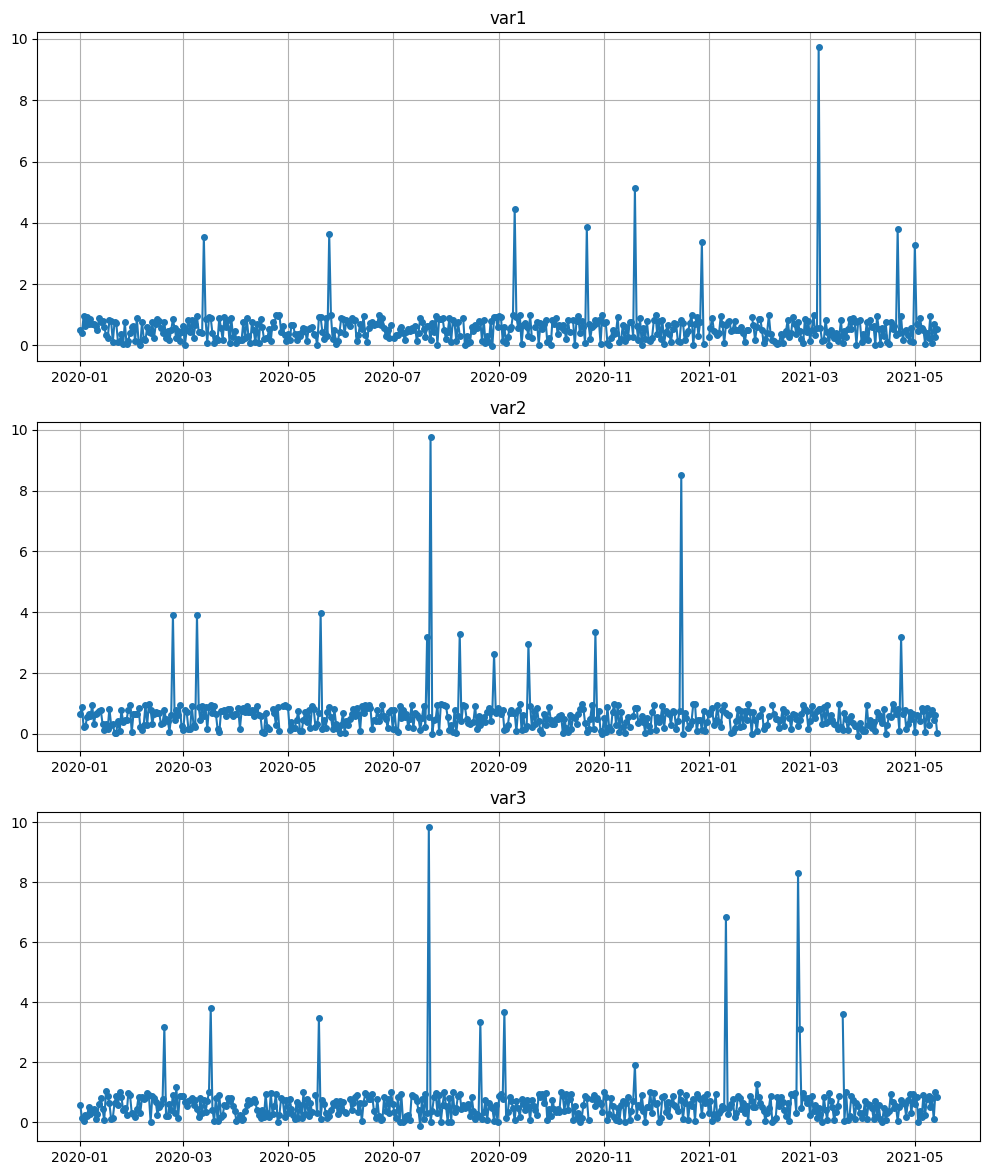

In [13]:
# plot the data
plot_df(df)

In [14]:
# create anomaly agent
anomaly_agent = AnomalyAgent()

# detect anomalies
anomalies = anomaly_agent.detect_anomalies(df)

# detect anomalies without verification
anomalies_no_verify = anomaly_agent.detect_anomalies(df, verify=False)

# print anomalies
print(anomalies)


{'var1': AnomalyList(anomalies=[Anomaly(timestamp='2020-03-13', variable_value=3.546293, anomaly_description='Significantly higher than typical values observed previously.'), Anomaly(timestamp='2020-05-25', variable_value=3.628891, anomaly_description='Significantly higher than typical values observed previously.'), Anomaly(timestamp='2020-09-10', variable_value=4.457951, anomaly_description='Significantly higher than typical values observed previously.'), Anomaly(timestamp='2020-11-19', variable_value=5.124185, anomaly_description='Significantly higher than typical values observed previously.'), Anomaly(timestamp='2021-03-06', variable_value=9.728473, anomaly_description='Significantly higher than typical values observed previously.'), Anomaly(timestamp='2021-04-21', variable_value=3.797667, anomaly_description='Significantly higher than typical values observed previously.'), Anomaly(timestamp='2021-05-01', variable_value=3.262172, anomaly_description='Significantly higher than typica

In [15]:
# get anomalies in long format
df_anomalies_long = anomaly_agent.get_anomalies_df(anomalies)
df_anomalies_long.head()

,timestamp,variable_name,value,anomaly_description
0,2020-03-13,var1,3.546293,Significantly higher than typical values observed previously.
1,2020-05-25,var1,3.628891,Significantly higher than typical values observed previously.
2,2020-09-10,var1,4.457951,Significantly higher than typical values observed previously.
3,2020-11-19,var1,5.124185,Significantly higher than typical values observed previously.
4,2021-03-06,var1,9.728473,Significantly higher than typical values observed previously.


In [16]:
# get anomalies in wide format
df_anomalies_wide = anomaly_agent.get_anomalies_df(anomalies, format="wide")

df_anomalies_wide_no_verify = anomaly_agent.get_anomalies_df(anomalies_no_verify, format="wide")

df_anomalies_wide.head()


,timestamp,var1,var2,var3
0,2020-03-13,3.546293,NaN,NaN
1,2020-05-25,3.628891,NaN,NaN
2,2020-09-10,4.457951,NaN,NaN
3,2020-11-19,5.124185,NaN,NaN
4,2021-03-06,9.728473,NaN,NaN


In [17]:
# merge anomalies with original data
df_final = df.merge(df_anomalies_wide, on="timestamp", how="left", suffixes=("", "_anomaly_flag"))

df_final_no_verify = df.merge(df_anomalies_wide_no_verify, on="timestamp", how="left", suffixes=("", "_anomaly_flag"))

df_final.head()


,timestamp,var1,var2,var3,var1_anomaly_flag,var2_anomaly_flag,var3_anomaly_flag
0,2020-01-01,0.497166,0.652036,0.578127,NaN,NaN,NaN
1,2020-01-02,0.400659,0.880572,0.151246,NaN,NaN,NaN
2,2020-01-03,0.956371,0.220344,0.029360,NaN,NaN,NaN
3,2020-01-04,0.628746,0.249972,0.249382,NaN,NaN,NaN
4,2020-01-05,0.917257,0.541513,0.215437,NaN,NaN,NaN


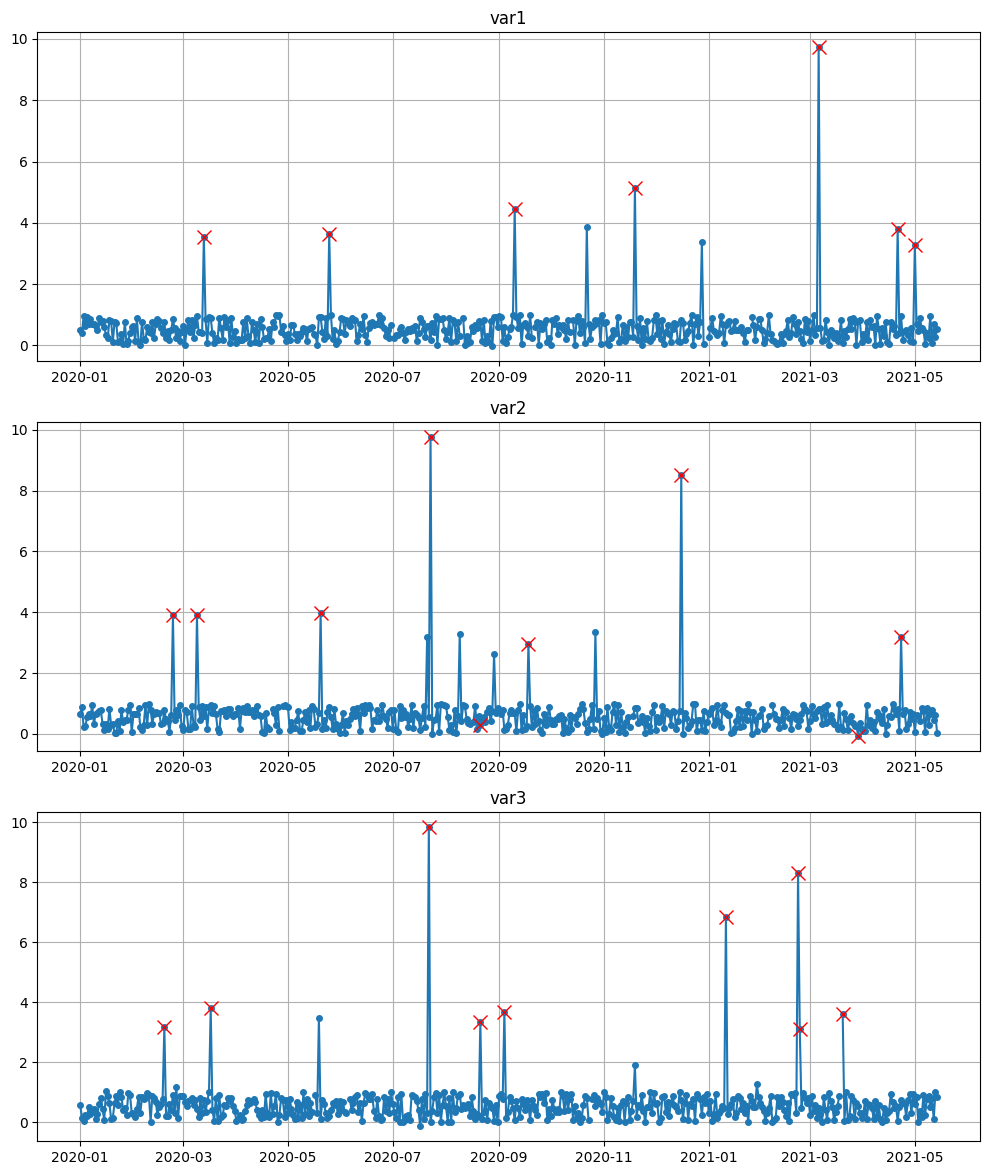

In [18]:
# plot final data with anomalies
plot_df(df_final)

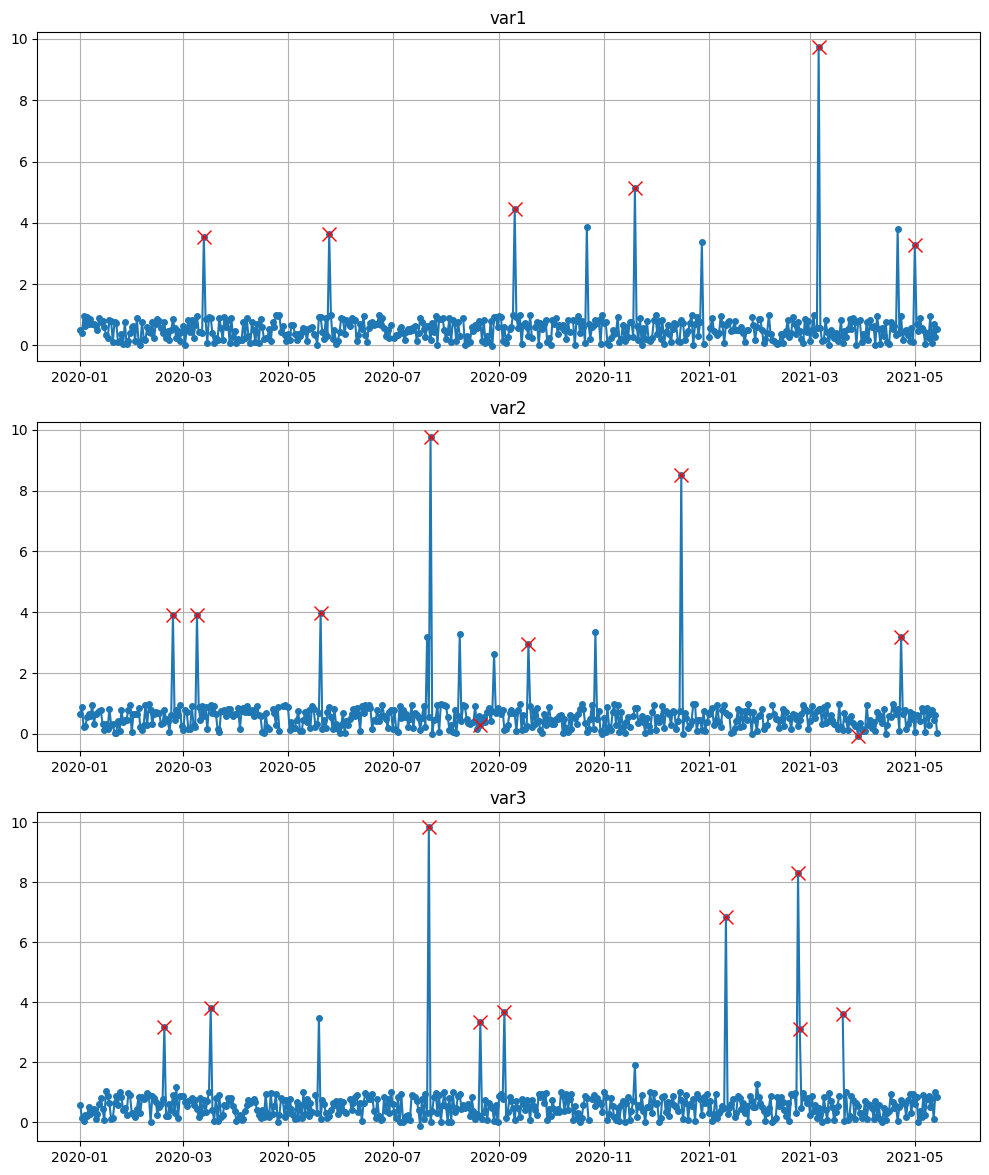

In [20]:
# plot final data no verify
plot_df(df_final_no_verify)